In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import defaultdict

from classify_packets import classify_packets
from slim_packet import SlimPacket

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.


Loading model models/model-train-left-right.pkl...
Loading packets...
Running classifier...
Done.
Accuracy: 0.754


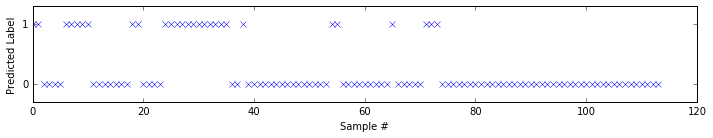

Loading model models/model-train-left-right.pkl...
Loading packets...
Running classifier...
Done.
Accuracy: 0.983


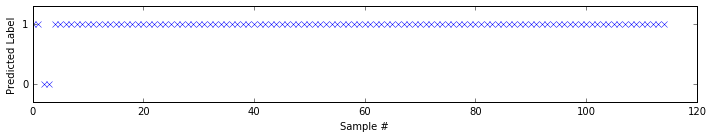

In [19]:
model = 'models/model-train-left-right.pkl'
# packets_filename = 

def plot(packets_filename, expected, filename):
    predictions = classify_packets(model, packets_filename, print_results=False)
    accuracy = len(filter(lambda p: p == expected, predictions)) / float(len(predictions))
    print 'Accuracy: %.3f' % accuracy
    plt.figure(figsize=(10, 2))
    plt.plot(predictions, 'x')
    plt.ylim(-0.3, 1.3)
    plt.yticks([0, 1])
    plt.ylabel('Predicted Label')
    plt.xlabel('Sample #')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

plot('packets/packets-train-room-left-1484076258118.pkl', 0, 'fig_eval2_predict_left.pdf')
plot('packets/packets-train-room-right-1484076320574.pkl', 1, 'fig_eval2_predict_right.pdf')

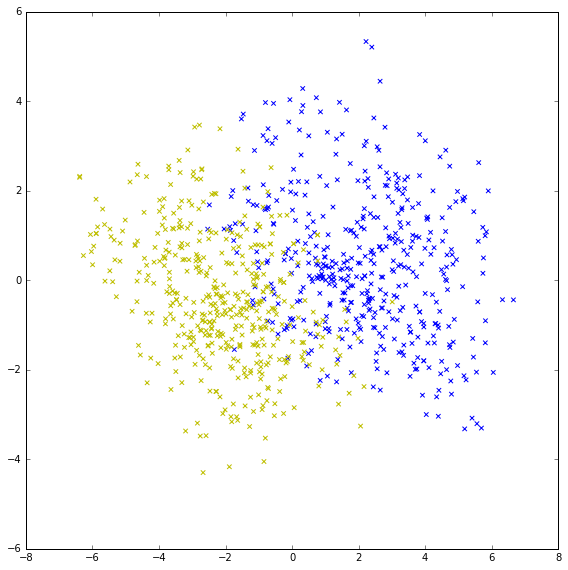

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
model = Pipeline([
    ('imp', Imputer(missing_values='NaN', strategy='median', axis=0)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=30)),
    ('select', SelectKBest(f_classif, k=2)),
])
with open('data/training-data-train-left-right.pkl') as f:
    training_data = pickle.load(f)
X_pca = model.fit_transform(training_data['xs'], training_data['ys'])

plot_xs = [i[0] for i in X_pca]
plot_ys = [i[1] for i in X_pca]
colors = ['b', 'y', 'r', 'g']
plot_colors = [colors[i] for i in training_data['ys']]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(plot_xs, plot_ys, c=plot_colors, marker='x')

plt.tight_layout()
plt.savefig('fig_eval2_pca.pdf')
plt.show()